## Credit Card analysis by segmentation to define  marketing strategy

#### The case requires to develop a customer segmentation to define market strategy. The sample dataset summarizes the usage behaviour of about 9000 (approx) active credit card holderss during the last 6 months

## 1. Import relevant libraries, modules and packages 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import warnings 
import statsmodels.api as sm
import seaborn as sns

sns.set()
%matplotlib inline

## 2. Dataset Visualization

In [2]:
## reading out the available data
data = pd.read_csv('CC GENERAL.csv')

## viewing it
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

#### The file is at a customer level with 18 behavioural variables

#### Following is the Data Dictionary for Credit Card dataset:-
#### CUST ID:-Identification of Credit Card holder(Categorical)
#### BALANCE:-Balance amount left in their account to make purchases
#### BALANCE FREQUENCY:-How frequently the balance is updated, score between 0 and 1 (1 = frequently ,0 = not frequently updated)
#### PURCHASES:-Amount of purchases made from account
#### ONEOFFPURCHASES:-Maximum purchase amount done in one-go
#### INSTALLMENTSPURCHASES:-Amount of purchases done in installment
#### CASHADVANCE:-Cash in advance given by the user
#### PURCHASESFREQUENCY:-How frequently the purchases is made,score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
#### ONEOFFPURCHASEFREQUENCY:-How frequently purchases are happening in one-go (1 = frequently purchased,0 = not frequently purchased)
#### PURCHASEINSTALLMENTFREQUENCY:-How frequently purchases installments are being done(1 = frequently done,0 = not frequently done)
#### CASHADVANCEFREQUENCY:-How frequently the cash advance being paid
#### CASHADVANCETRX:-Number of transactions made with 'Cash in Advanced'
#### PURCHASESTRX:-Number of purchases transactions made
#### CREDITLIMIT:-Limit of Credit Card for user
#### PAYMENTS:- Amount of Payment done by user
#### MINIMUM_PAYMENTS:-Minimum amount of payments made by user
#### PERCFULLPAYMENTS:-Percent of full payment paid by user
#### TENURE:-Tenure of credit card service or user


## 3. Statistical Summaries

In [4]:
## Available data summary
data.describe(include = 'all')

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
unique,8950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,C10683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,NaN,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,NaN,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,NaN,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,NaN,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000


###### The dataset contains 8950 rows for all features
###### Frequency are mostly common for all business entry 

<Figure size 1440x864 with 0 Axes>

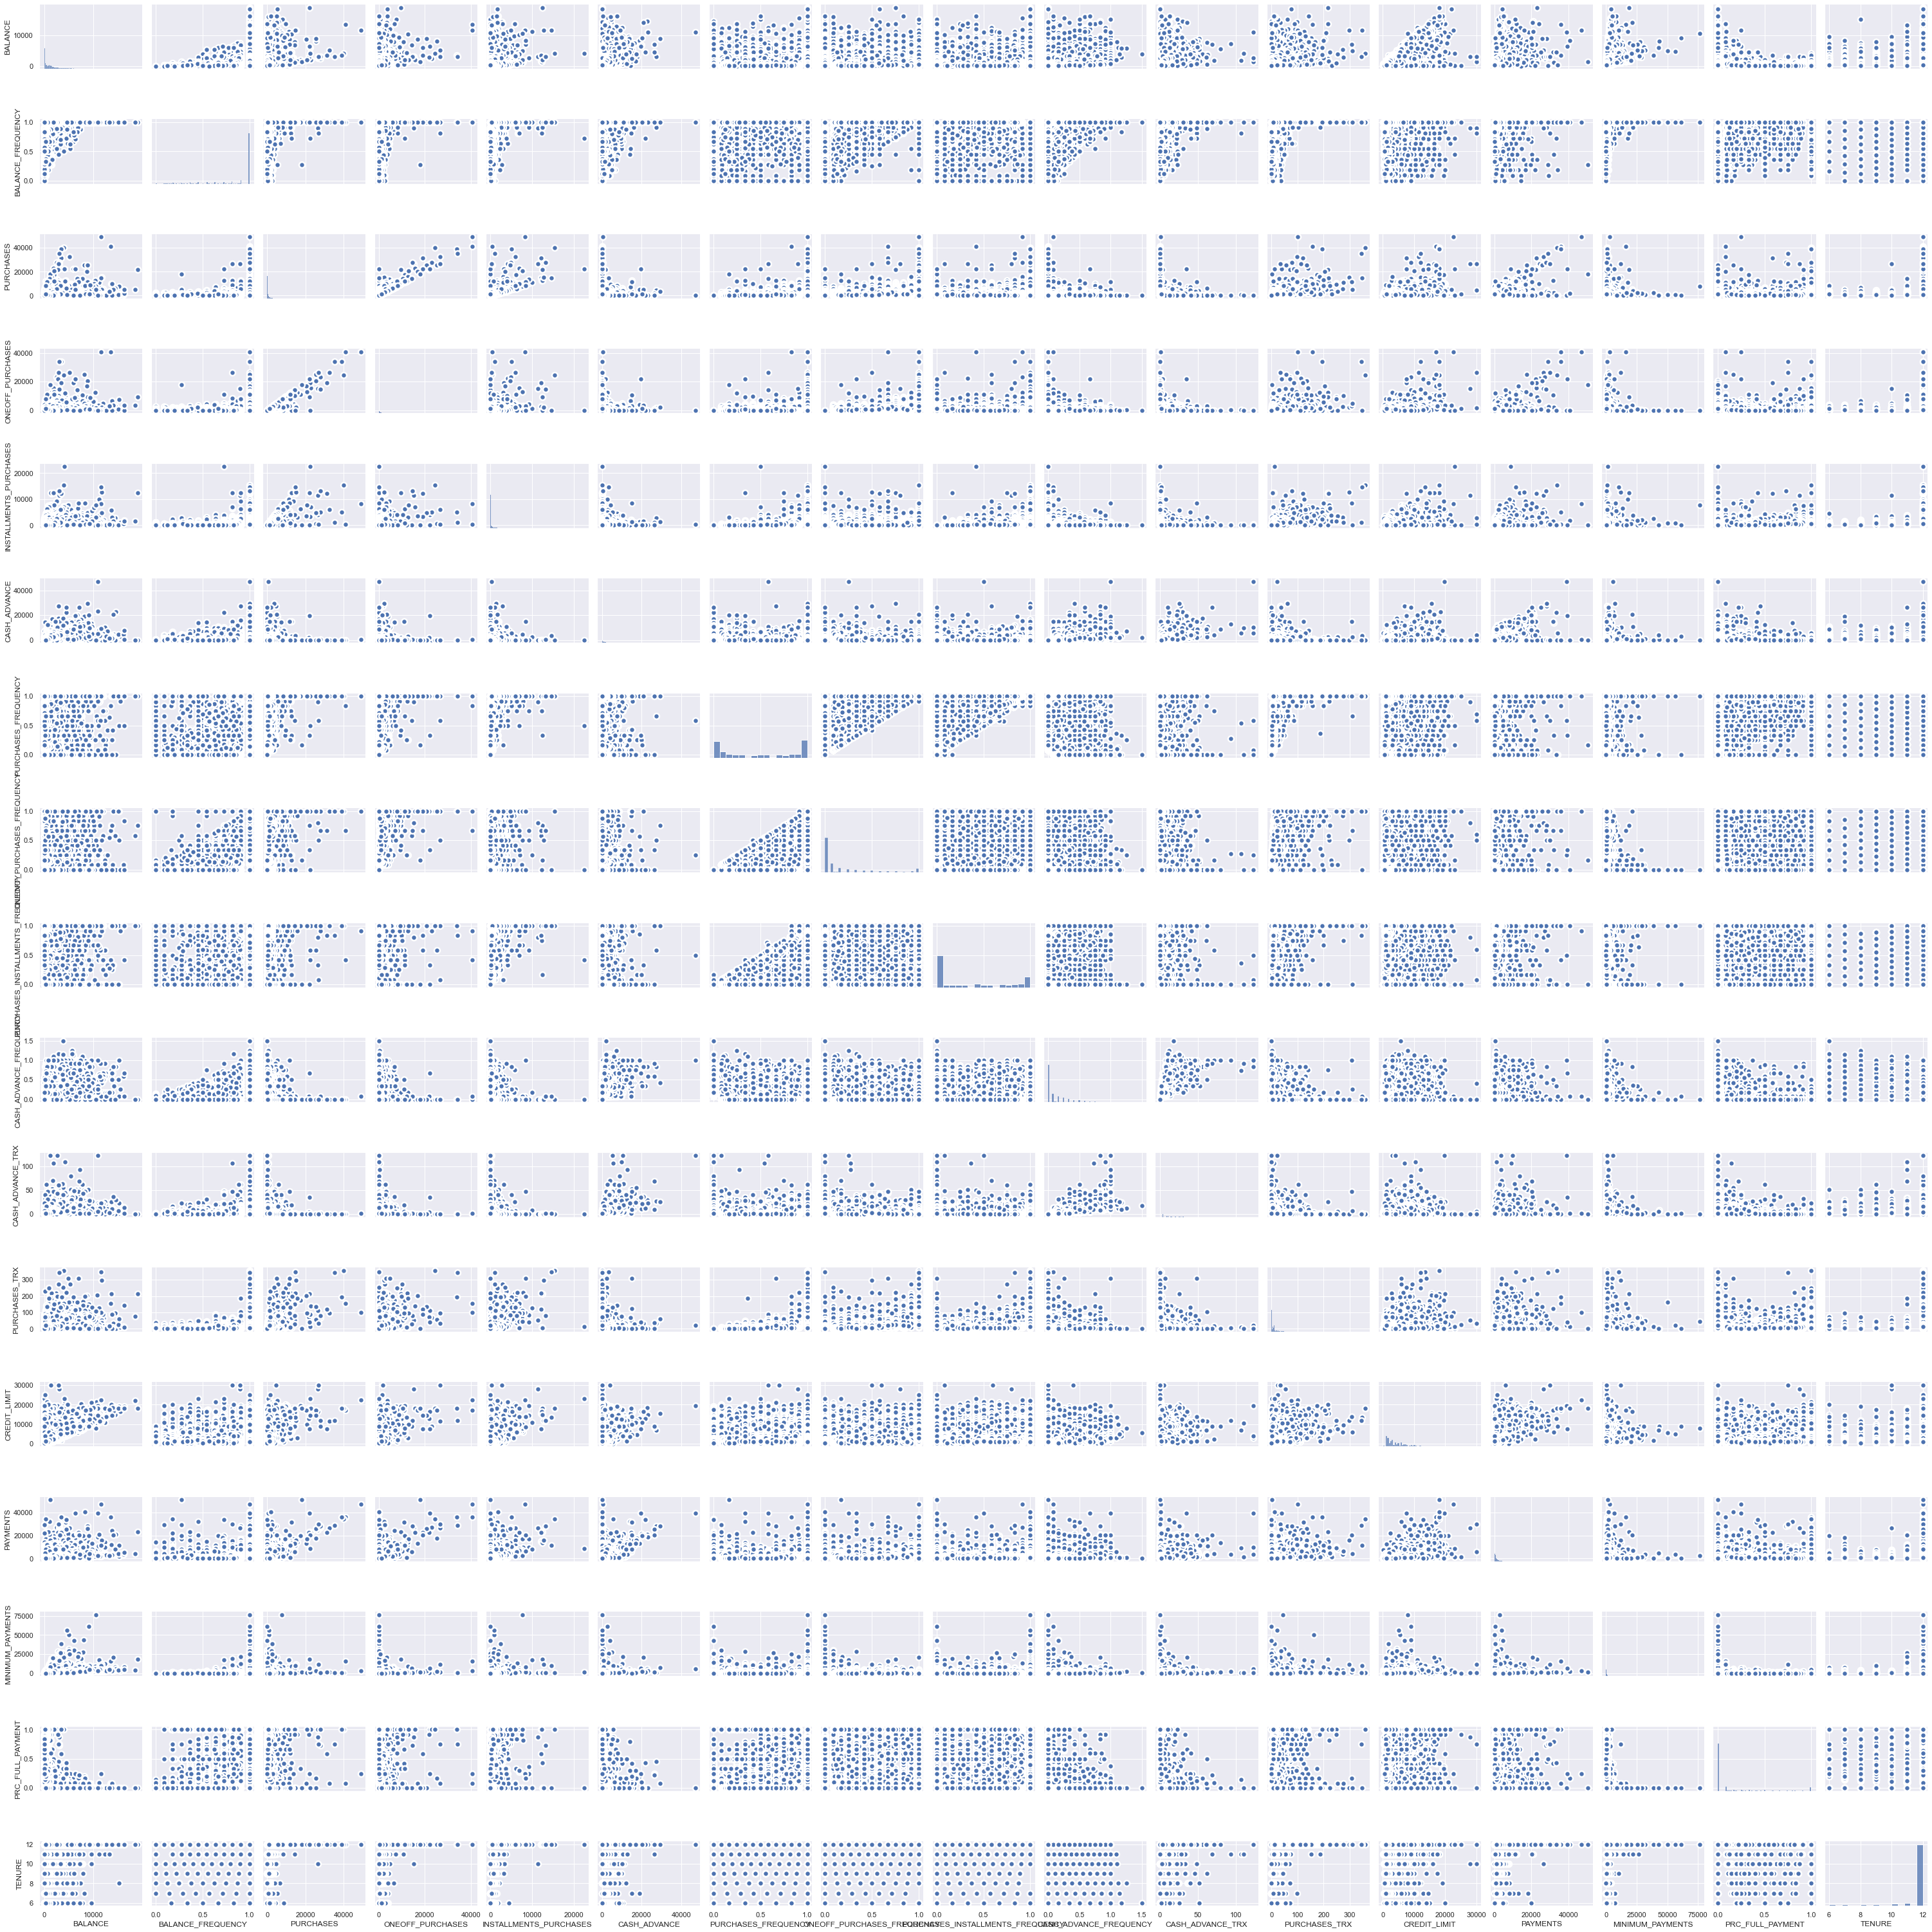

In [5]:
# Type of correlations 
plt.figure(figsize = (20, 12))
num_cols = ['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']
sns.pairplot(data[num_cols], kind="scatter", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

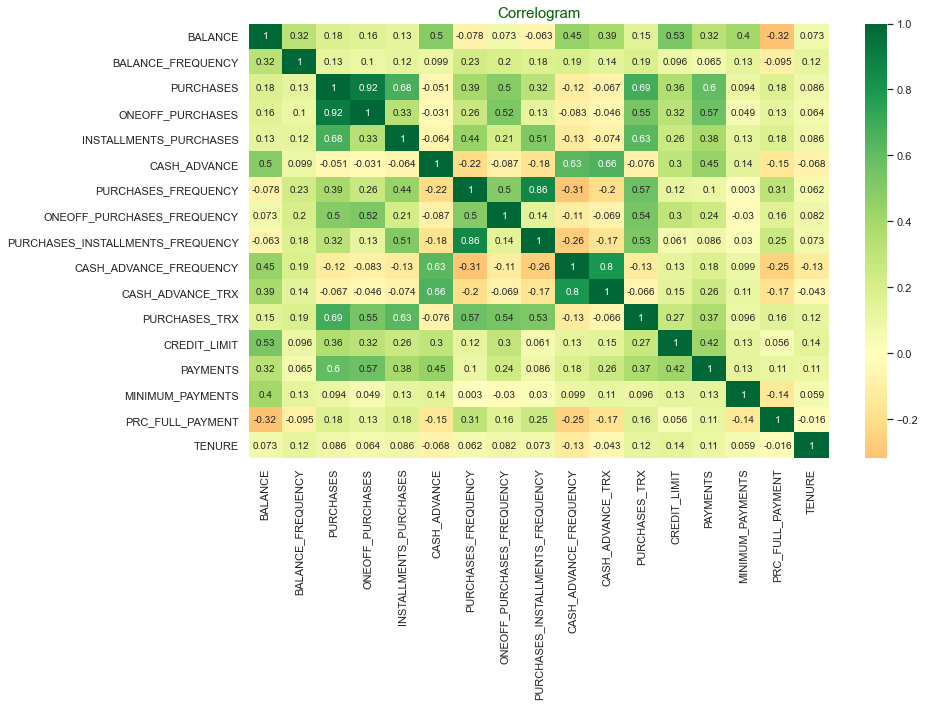

In [6]:
# Quantify correlations
corr = data.corr()
plt.figure(figsize = (13, 8))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

###### There is a positive correlation between Cash Advance and Balance, Credit_limit and Balance, Purchases and One_off_purchases, Purchase_trx and One_off_purchases, Payments and One_off_purchases

###### All features with frequenty dated have a positive correlation relationship with there frequented data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

## Check for missing variable

In [8]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
## filling with mean will not be bad for the MINIMUM_PAYMENTS features with missing observations

data1 = data.fillna(0)

In [11]:
print(data1.isnull().sum().any())

False


In [12]:
data1.shape

(8950, 18)

###### The dataset contains 18 features for 8950 observations so each instance has a 18-dimensional space coordinate
###### However its will be difficult to analyze in 3D world or 2D plot

###### PCA will be implemented for dimensionalty reduction
###### i.e reducing from 18D to 2D where all features will be summarised into the coordinate

In [13]:
# Implementing Principal Component Analysis
# Scaling since most features have a big difference in there refrence value

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Normalizing the  numerical features
numeric_features = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

scaled_features = MinMaxScaler().fit_transform(data1[numeric_features])

# Resolving to two principal components
pca = PCA(n_components=2).fit(scaled_features)
featured_2D = pca.transform(scaled_features)
featured_2D[0:4]

array([[-0.48215942, -0.09759775],
       [-0.60858102, -0.01943018],
       [ 0.30449877,  0.92092436],
       [-0.58863274, -0.0057067 ]])

###### Now we have an arrray of 2_dimensional plots

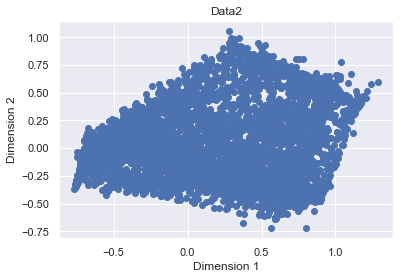

In [14]:
# visualizing the pplots

plt.scatter(featured_2D[:,0],featured_2D[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data2')
plt.show()

###### To determine the number of clusters to be segmented using WCSS


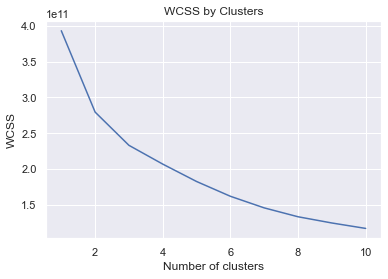

In [15]:
# importing relevant libraries for these technique
from sklearn.cluster import KMeans

# Create 10 models ranging 1 - 10 number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    # fitting the datapoints
    kmeans.fit(data1[numeric_features].values)
    # Obtain the WCSS (inertia) value
    wcss.append(kmeans.inertia_)
    
# Plotting the WCSS values on a line graph
plt.plot(range(1, 11), wcss)
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

###### From the above line graph it can be suggested that there is ony 2 to 3 resonable clusters for these datapoints

## K-Means Clustering Algorithm

In [16]:
# importing the relevant modules
from sklearn.cluster import KMeans

# Create a model based on 3 centroids(cluster centre points)
KMmodel = KMeans(n_clusters=3, init='k-means++', n_init=100, max_iter=1000)

# Training and predicting on cluster assignments for each data point
KM_cluster = KMmodel.fit(data1[numeric_features].values)
KM_clusters = KMmodel.predict(data1[numeric_features].values)

# Viewing the cluster assignments
KM_clusters

array([0, 2, 2, ..., 0, 0, 0])

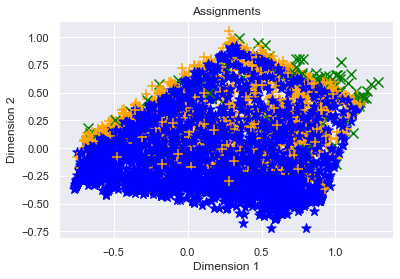

In [18]:
# Visualization of the algorithm mechanism

def plot_clusters(samples, clusters):
    col_dic = {0:'blue',1:'green',2:'orange'}
    mrk_dic = {0:'*',1:'x',2:'+'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker=markers[sample], s=100)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Assignments')
    plt.show()

plot_clusters(featured_2D, KM_clusters)

###### The dataset has been clustered into three major segments

###### It is observed that much of the datasets belong to the class 0
###### This can further used to build a classification model that preicts future observations on this 3 classes

## Agglomerative Clustering Algorithm

In [24]:
# importing relevant libraries
from sklearn.cluster import AgglomerativeClustering


# Training and fitting on the model
Agg_model = AgglomerativeClustering(n_clusters=3)
Agg_clusters = Agg_model.fit_predict(data1[numeric_features])


# Viewing the model 
Agg_clusters


array([1, 2, 2, ..., 1, 1, 1], dtype=int64)

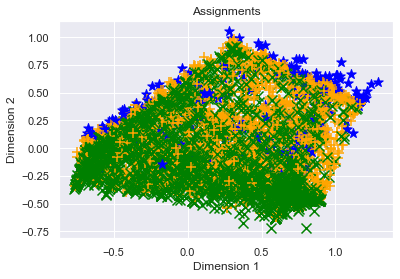

In [25]:
# Visualization of the algorithm mechanism

def plot_clusters(samples, clusters):
    col_dic = {0:'blue',1:'green',2:'orange'}
    mrk_dic = {0:'*',1:'x',2:'+'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker=markers[sample], s=100)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Assignments')
    plt.show()

plot_clusters(featured_2D, Agg_clusters)

###### The models has done a pretty good job clustering individual observations into a family of 3


## Saving the model

In [29]:
#import related package
import joblib

# creating a directory
filename = './MODELS.pkl'
joblib.dump(Agg_clusters,filename)

# saving the second model
filename ='./MODELS2.pkl'
joblib.dump(KM_clusters,filename)

['./MODELS2.pkl']